<a href="https://colab.research.google.com/github/NguyenQuanManh/AI_PROJECT/blob/main/train_fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-disease-detection/apple_disease_classification/Untitled.ipynb
/kaggle/input/apple-disease-detection/apple_disease_classification/.ipynb_checkpoints/Untitled-checkpoint.ipynb
/kaggle/input/apple-disease-detection/apple_disease_classification/Test/Blotch_Apple/149.jpg
/kaggle/input/apple-disease-detection/apple_disease_classification/Test/Blotch_Apple/143.jpg
/kaggle/input/apple-disease-detection/apple_disease_classification/Test/Blotch_Apple/131.jpg
/kaggle/input/apple-disease-detection/apple_disease_classification/Test/Blotch_Apple/130.jpg
/kaggle/input/apple-disease-detection/apple_disease_classification/Test/Blotch_Apple/120.jpg
/kaggle/input/apple-disease-detection/apple_disease_classification/Test/Blotch_Apple/124.jpg
/kaggle/input/apple-disease-detection/apple_disease_classification/Test/Blotch_Apple/123.jpg
/kaggle/input/apple-disease-detection/apple_disease_classification/Test/Blotch_Apple/137.jpg
/kaggle/input/apple-disease-detection/apple_disease_classifica

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_fruit=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set=train_fruit.flow_from_directory('/kaggle/input/apple-disease-detection/apple_disease_classification/Train',
                                               target_size=(150,150), batch_size=32, class_mode='categorical')
val=train_fruit.flow_from_directory('/kaggle/input/apple-disease-detection/apple_disease_classification/Test',
                                             target_size=(150,150), batch_size=32, class_mode='categorical')

Found 382 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [ ]:
print(training_set.class_indices,
      val.class_indices)

{'Blotch_Apple': 0, 'Normal_Apple': 1, 'Rot_Apple': 2, 'Scab_Apple': 3} {'Blotch_Apple': 0, 'Normal_Apple': 1, 'Rot_Apple': 2, 'Scab_Apple': 3}


In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       7

2022-12-06 17:27:48.590761: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(training_set, epochs=100, batch_size=128)

2022-12-06 17:27:49.328965: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
12/12 [==============================] - 25s 2s/step - loss: 19.3785 - accuracy: 0.3141
Epoch 2/100
12/12 [==============================] - 22s 2s/step - loss: 1.2785 - accuracy: 0.3717
Epoch 3/100
12/12 [==============================] - 23s 2s/step - loss: 1.2775 - accuracy: 0.4450
Epoch 4/100
12/12 [==============================] - 22s 2s/step - loss: 1.6041 - accuracy: 0.4241
Epoch 5/100
12/12 [==============================] - 22s 2s/step - loss: 1.1378 - accuracy: 0.5785
Epoch 6/100
12/12 [==============================] - 23s 2s/step - loss: 1.2556 - accuracy: 0.5131
Epoch 7/100
12/12 [==============================] - 23s 2s/step - loss: 1.3186 - accuracy: 0.5131
Epoch 8/100
12/12 [==============================] - 22s 2s/step - loss: 1.0511 - accuracy: 0.5838
Epoch 9/100
12/12 [==============================] - 23s 2s/step - loss: 1.0047 - accuracy: 0.6073
Epoch 10/100
12/12 [==============================] - 23s 2s/step - loss: 1.0609 - accuracy: 0.5969
Epoch 11

In [ ]:
model.save('fruit.h5')

In [ ]:
model_h5=load_model('fruit.h5')

Đây là loại: blotch


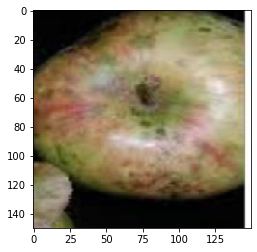

In [ ]:
img = load_img('/kaggle/input/apple-disease-detection/apple_disease_classification/Test/Blotch_Apple/125.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_h5.predict(img)
class_name=['blotch','Cedar','health','scrab']
a= int(np.argmax(result,axis=1))
print("Đây là loại:", class_name[a])

In [ ]:
! jupyter nbconvert --to html /kaggle/input/traindata/train-fruit-apple.ipynb

[NbConvertApp] Converting notebook /kaggle/input/traindata/train-fruit-apple.ipynb to html
[NbConvertApp] Writing 749497 bytes to /kaggle/input/traindata/train-fruit-apple.html
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.7/site-packages/jupyter_core/application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/traitlets/config/application.py", line 976, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_single_notebook
    write_results = se